<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Basic-OLS-linear-regression" data-toc-modified-id="Basic-OLS-linear-regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Basic OLS linear regression</a></span></li><li><span><a href="#Stationnarize-data" data-toc-modified-id="Stationnarize-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Stationnarize data</a></span></li><li><span><a href="#Implement-Regression" data-toc-modified-id="Implement-Regression-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Implement Regression</a></span><ul class="toc-item"><li><span><a href="#Simple-regression-for-equity" data-toc-modified-id="Simple-regression-for-equity-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Simple regression for equity</a></span></li><li><span><a href="#Simple-regression-for-fixed-income" data-toc-modified-id="Simple-regression-for-fixed-income-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Simple regression for fixed income</a></span></li><li><span><a href="#Simple-regression-for-credits" data-toc-modified-id="Simple-regression-for-credits-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Simple regression for credits</a></span></li><li><span><a href="#Simple-regression-for-commodities" data-toc-modified-id="Simple-regression-for-commodities-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Simple regression for commodities</a></span></li></ul></li></ul></div>

# Load data

In [1]:
import pandas as pd
import numpy as np

In [2]:
data_asset_classes = pd.read_excel('Data_Bloom.xlsx',
                                   sheet_name='AssetClasses',
                                  skiprows=1,
                                  usecols=lambda x: 'Unnamed' not in x)
data_macro_bb = pd.read_excel('Data_Bloom.xlsx',sheet_name='Macro_BB',
                              header=4)

In [3]:
data_macro_bb = data_macro_bb.drop(columns={'Ticker'})
data_macro_bb = data_macro_bb.drop(0)
data_macro_bb

CESIG10 SPEDPOSS CSIIG10 EPUCGLOB     MOVE BASPTDSP CIGMEMRA USDECMIN  \
1      33.3    49.31    1.16     62.8  43.7518    51.49   -0.651  10480.1   
2      33.6    48.78    1.55    55.79  43.8016    62.89   -0.709  10480.1   
3       9.2    48.34    2.73    58.87  57.2463     55.8   -0.692  10233.4   
4      10.6    47.76   -0.88    57.86  70.4009    41.81   -0.563  10233.4   
5        22    47.81    0.98    73.21  81.4022   151.54   -0.548  10233.4   
..      ...      ...     ...      ...      ...      ...      ...      ...   
147   -24.8    67.12  -15.98   342.43  62.0071    35.36   -0.043  20357.4   
148   -27.5    67.04  -14.31   289.57  49.6467    35.36   -0.121  20357.4   
149   -11.6    67.71  -10.48   359.32  79.0769    35.36    0.211  20357.4   
150     2.6    68.53   -9.86   321.34  70.8067    35.36     0.05  22290.2   
151    -0.2    69.08  -20.45    300.8  59.1064    35.36   -0.141  22290.2   

      USSOA MXEF0CX0 EPUCMONE ECSUSUUS      CRY JPMVXYEM  FARBAST  FEDOTLA  
1    5.2595  976.713    31.23   -0.581   228.79     6.41   645496  2827.02  
2     5.265  1007.07    36.28    0.012   231.62     6.64   654509  2913.25  
3     5.255   1006.3    42.46    0.759  233.225     6.78   644211  2906.26  
4    5.2445   1005.3    25.43    0.794   236.69     6.99   630524  2844.84  
5    4.9965  1001.69   148.93    0.619   226.43     8.07   639430  2877.49  
..      ...      ...      ...      ...      ...      ...      ...      ...  
147   2.352  1452.39   146.16   -0.546  159.378     8.24  3361870  2002.07  
148   2.157  1482.87   100.78   -0.435  160.429        7  3396030  2002.07  
149  1.9945  1451.99   276.78   -0.138  155.038     8.89  3393759  2002.07  
150  1.8425  1474.82   128.55   -0.183  159.534     8.15  3525281  2002.07  
151   1.587  1470.15    89.82   -0.267  158.706     7.15  3615924  2002.07  

[151 rows x 16 columns]

In [4]:
# Import necessary modules and set options
import itertools
import seaborn as sns

from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV, LarsCV
from sklearn.cross_decomposition import PLSRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt

In [5]:
data_asset_classes

EQUITIES  FIXED INCOME      CREDIT          FX       COMMO
0    6140.113797     92.621057   93.291791  106.302459  171.723061
1    6259.896439     92.424588   93.596445  107.868522  172.245547
2    6136.087754     91.198910   93.461690  108.409810  168.917233
3    5911.690919     91.626959   93.296569  108.212663  169.375228
4    5867.455560     92.710196   93.277975  107.320146  161.310538
..           ...           ...         ...         ...         ...
146  5432.435554    161.301455  104.157299  116.442601  117.557718
147  5458.715877    165.018025  104.671469  117.930310  121.204917
148  5400.022518    171.936532  104.999235  116.193849  119.719763
149  5610.929233    171.654600  105.089769  117.589149  121.415728
150  5706.616648    167.644215  104.606329  117.114569  121.672495

[151 rows x 5 columns]

In [6]:
# create y for all asset classes
equity = np.array(data_asset_classes['EQUITIES'])
fi = np.array(data_asset_classes['FIXED INCOME'])
credit = np.array(data_asset_classes['CREDIT'])
commo = np.array(data_asset_classes['COMMO'])

## Stationnarize data

In [7]:
equity = pd.DataFrame(equity)[0].shift(1) -  pd.DataFrame(equity)[0]
fi = pd.DataFrame(fi)[0].shift(1) -  pd.DataFrame(fi)[0]
credit = pd.DataFrame(credit)[0].shift(1) -  pd.DataFrame(credit)[0]
commo = pd.DataFrame(commo)[0].shift(1) -  pd.DataFrame(commo)[0]
equity = - equity[1:]
fi = - fi[1:]
credit = - credit[1:]
commo = - commo[1:]

In [8]:
X = pd.DataFrame(data_macro_bb)
X_original = np.array(X.copy())


In [9]:
for i in X.columns:
    X[i] = pd.DataFrame(X[i]) - pd.DataFrame(X[i]).shift(1)

In [10]:
X = X.drop(1)

In [11]:
X

CESIG10 SPEDPOSS CSIIG10 EPUCGLOB     MOVE BASPTDSP CIGMEMRA USDECMIN  \
2       0.3    -0.53    0.39    -7.01  0.04976     11.4   -0.058        0   
3     -24.4    -0.44    1.18     3.08  13.4447    -7.09    0.017  -246.72   
4       1.4    -0.58   -3.61    -1.01  13.1547   -13.99    0.129        0   
5      11.4     0.05    1.86    15.35  11.0012   109.73    0.015        0   
6       -30     -0.1   -5.97    19.12 -8.55356    -8.22    -0.16     1069   
..      ...      ...     ...      ...      ...      ...      ...      ...   
147   -11.2    -0.77   -4.23    59.23 -3.10754        0   -0.179 -2016.69   
148    -2.7    -0.08    1.67   -52.86 -12.3605        0   -0.078        0   
149    15.9     0.67    3.83    69.75  29.4302        0    0.332        0   
150    14.2     0.82    0.62   -37.98 -8.27024        0   -0.161  1932.77   
151    -2.8     0.55  -10.59   -20.54 -11.7002        0   -0.191        0   

      USSOA MXEF0CX0 EPUCMONE ECSUSUUS      CRY JPMVXYEM FARBAST  FEDOTLA  
2    0.0055  30.3542     5.05    0.593  2.83057     0.23    9013   86.226  
3     -0.01 -0.76622     6.18    0.747  1.60456     0.14  -10298   -6.986  
4   -0.0105 -1.00026   -17.03    0.035  3.46528     0.21  -13687   -61.42  
5    -0.248 -3.61161    123.5   -0.175 -10.2602     1.08    8906   32.652  
6   -0.2815 -11.5252     5.21   -0.005  7.97108    -0.61   -8688 -109.856  
..      ...      ...      ...      ...      ...      ...     ...      ...  
147  -0.022  3.24216    93.54   -0.422  2.27096    -0.27  -97304        0  
148  -0.195  30.4783   -45.38    0.111  1.05099    -1.24   34160        0  
149 -0.1625  -30.879      176    0.297 -5.39142     1.89   -2271        0  
150  -0.152  22.8258  -148.23   -0.045  4.49612    -0.74  131522        0  
151 -0.2555 -4.66179   -38.73   -0.084 -0.82835       -1   90643        0  

[150 rows x 16 columns]

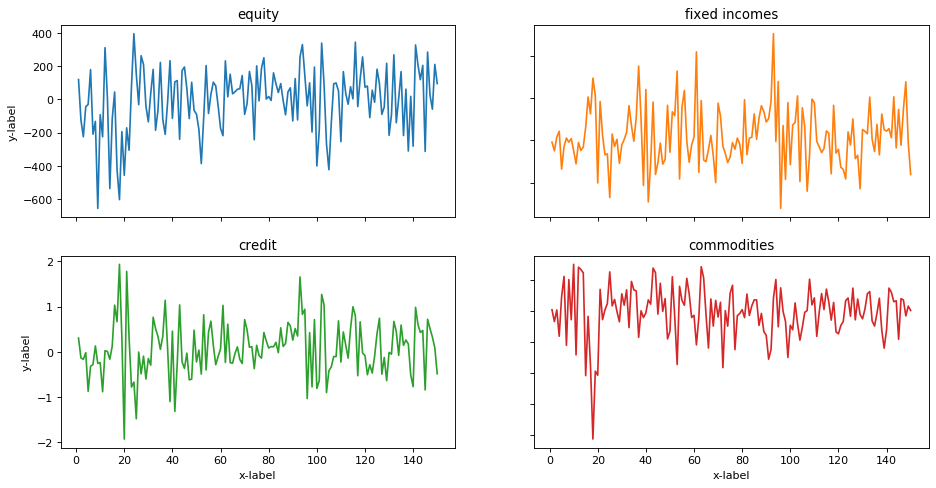

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(14, 7), dpi= 80, facecolor='w', edgecolor='k')
axs[0, 0].plot(equity)
axs[0, 0].set_title('equity')
axs[0, 1].plot(fi, 'tab:orange')
axs[0, 1].set_title('fixed incomes')
axs[1, 0].plot(credit, 'tab:green')
axs[1, 0].set_title('credit')
axs[1, 1].plot(commo, 'tab:red')
axs[1, 1].set_title('commodities')

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [13]:
X = np.array(X)

In [14]:
from statsmodels.tsa.stattools import adfuller, kpss


# ADF Test
result = adfuller(pd.DataFrame(X[:,0]).values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critical Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(pd.DataFrame(X[:,0]).values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critical Values:')
    print(f'   {key}, {value}')

ADF Statistic: -9.2101761571943
p-value: 1.8970716212213038e-15
Critical Values:
   1%, -3.476597917537401
Critical Values:
   5%, -2.8818291230495543
Critical Values:
   10%, -2.5775887982253085

KPSS Statistic: 0.058110
p-value: 0.100000
Critical Values:
   10%, 0.347
Critical Values:
   5%, 0.463
Critical Values:
   2.5%, 0.574
Critical Values:
   1%, 0.739


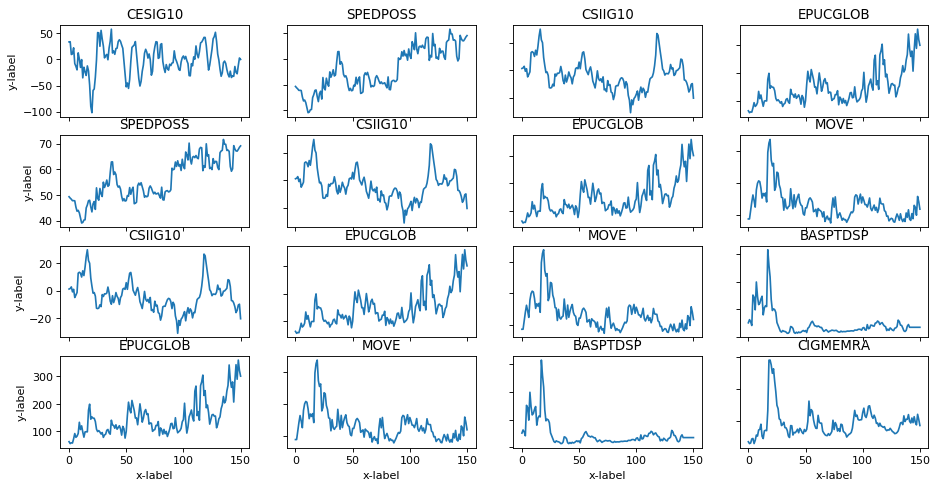

In [15]:
fig, axs = plt.subplots(4, 4, figsize=(14, 7), dpi= 80, facecolor='w', edgecolor='k')


for i in range(4):
    for j in range(4):
        axs[i, j].plot(X_original[:,i+j])
        axs[i, j].set_title(data_macro_bb.columns.to_list()[i+j])
        
for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

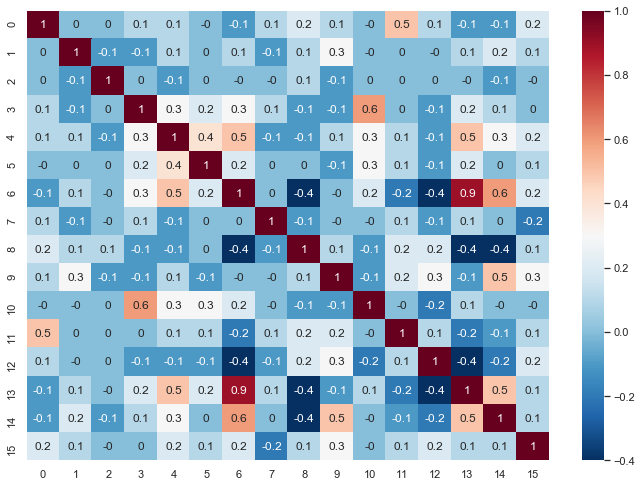

In [16]:
#etude de la correlation
sns.set(rc={'figure.figsize':(11.7,8.27)})
X_corr = pd.DataFrame(X.astype(float)).corr().round(1)
sns.heatmap(data=X_corr, annot=True, cmap="RdBu_r")

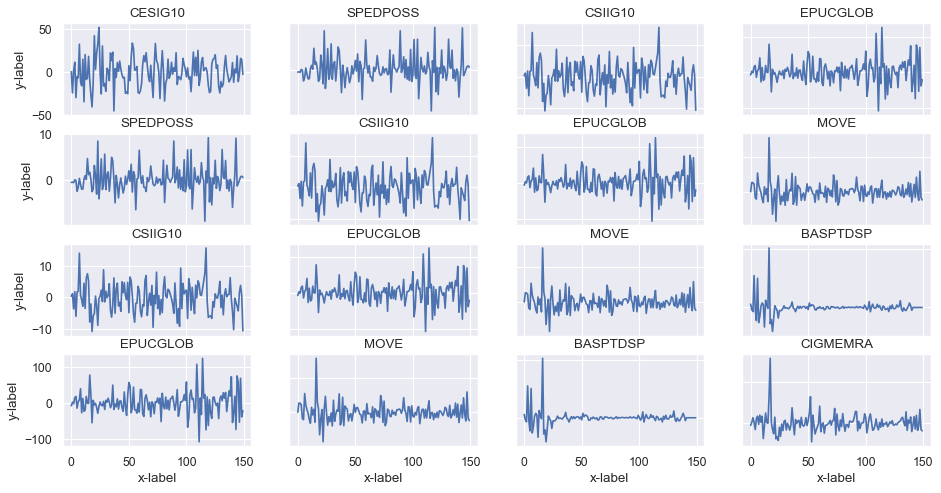

In [17]:
fig, axs = plt.subplots(4, 4, figsize=(14, 7), dpi= 80, facecolor='w', edgecolor='k')

for i in range(4):
    for j in range(4):
        axs[i, j].plot(X[:,i+j])
        axs[i, j].set_title(data_macro_bb.columns.to_list()[i+j])
        
for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

## Implement OLS Regression

## We first standardize data

In [18]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler(feature_range=(-1, 1))
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 

In [19]:
X = pd.DataFrame(X)
equity = pd.DataFrame(equity)
fi = pd.DataFrame(fi)
credit = pd.DataFrame(credit)
commo = pd.DataFrame(commo)

In [20]:
X = scaler.fit_transform(X)
equity = scaler.fit_transform(equity)
fi = scaler.fit_transform(fi)
credit = scaler.fit_transform(credit)
commo = scaler.fit_transform(commo)

In [21]:
X = pd.DataFrame(X)
equity = pd.DataFrame(equity)
fi = pd.DataFrame(fi)
credit = pd.DataFrame(credit)
commo = pd.DataFrame(commo)


In [22]:
X

0         1         2         3         4         5         6  \
0    0.030611 -0.229810  0.114264 -0.263284 -0.004126  0.456283 -0.284193   
1   -1.414150 -0.198557  0.283285  0.045735  1.046624 -0.276860  0.062948   
2    0.094953 -0.247172 -0.741539 -0.079526  1.023873 -0.550451  0.581346   
3    0.679876 -0.028405  0.428772  0.421519  0.854951  4.355146  0.053691   
4   -1.741707 -0.080492 -1.246464  0.536980 -0.679005 -0.321666 -0.756305   
..        ...       ...       ...       ...       ...       ...       ...   
145 -0.642051 -0.313149 -0.874189  1.765399 -0.251797  0.004264 -0.844248   
146 -0.144866 -0.073547  0.388121 -1.667497 -0.977634  0.004264 -0.376764   
147  0.943091  0.186890  0.850255  2.087587  2.300594  0.004264  1.520942   
148  0.843654  0.238977  0.163473 -1.211778 -0.656780  0.004264 -0.760934   
149 -0.150715  0.145220 -2.234917 -0.677657 -0.925843  0.004264 -0.899790   

            7         8         9        10        11        12        13  \
0   -0.050450  0.191097  1.099706  0.103830  1.371063  0.367707  0.142440   
1   -0.208540  0.092309 -0.164799  0.129010  1.728385  0.231006  0.085481   
2   -0.050450  0.089122 -0.174309 -0.388199  0.076352  0.438478  0.129782   
3   -0.050450 -1.424569 -0.280415  2.743358 -0.410904 -1.091928  0.680385   
4    0.634529 -1.638079 -0.601965  0.107395 -0.016458  0.940878 -0.389177   
..        ...       ...       ...       ...       ...       ...       ...   
145 -1.342676  0.015827 -0.001928  2.075732 -0.984011  0.305310 -0.173999   
146 -0.050450 -1.086777  1.104746 -1.019948  0.252693  0.169282 -0.787890   
147 -0.050450 -0.879640 -1.388359  3.913263  0.684263 -0.549051  1.193016   
148  1.188003 -0.812719  0.793804 -3.311847 -0.109269  0.553417 -0.471451   
149 -0.050450 -1.472370 -0.323086 -0.871760 -0.199760 -0.040265 -0.635999   

           14        15  
0   -0.117325  0.841998  
1   -0.327306 -0.013643  
2   -0.364157 -0.513321  
3   -0.118489  0.350214  
4   -0.309799 -0.957940  
..        ...       ...  
145 -1.273378  0.050485  
146  0.156115  0.050485  
147 -0.240023  0.050485  
148  1.214794  0.050485  
149  0.770291  0.050485  

[150 rows x 16 columns]

In [23]:

# split into train and test sets


X_train, X_test, y_equity_train, y_equity_test = train_test_split(X, equity, test_size=0.2, shuffle=False)
X_train, X_test, y_fi_train, y_fi_test = train_test_split(X, fi, test_size=0.2, shuffle=False)
X_train, X_test, y_credit_train, y_credit_test = train_test_split(X, credit, test_size=0.2, shuffle=False)
X_train, X_test, y_commo_train, y_commo_test = train_test_split(X, commo, test_size=0.2, shuffle=False)

reg = LinearRegression()
Lin_reg_equity = reg.fit(X_train, y_equity_train)
reg = LinearRegression()
Lin_reg_fi = reg.fit(X_train, y_fi_train)
reg = LinearRegression()
Lin_reg_credit = reg.fit(X_train, y_credit_train)
reg = LinearRegression()
Lin_reg_commo = reg.fit(X_train, y_commo_train)

In [24]:
print('training score for equity', Lin_reg_equity.score(X_train, y_equity_train))
print('training score for fi', Lin_reg_fi.score(X_train, y_fi_train))
print('training score for credit', Lin_reg_credit.score(X_train, y_credit_train))
print('training score for commo', Lin_reg_commo.score(X_train, y_commo_train))

training score for equity 0.5996840314713904
training score for fi 0.7082416363472982
training score for credit 0.7347573435321262
training score for commo 0.8932758920066063


In [25]:
print('coefs are', Lin_reg_equity.coef_)
print('intercept is', Lin_reg_equity.intercept_)

coefs are [[ 0.06554101 -0.10690833 -0.1074857  -0.10792541 -0.22395309  0.16869143
  -0.6767793  -0.22847439  0.2563318   0.0278134  -0.14225054  0.00609663
   0.00286203  0.17182166  0.34324095 -0.02419255]]
intercept is [-0.0396626]


In [26]:
y_equity_pred = Lin_reg_equity.predict(X_test)
print('RMSE is:', mean_squared_error(y_equity_test, y_equity_pred, squared=False))
print('mean error is:', np.mean(np.abs(y_equity_test - y_equity_pred)))

RMSE is: 0.9819294410921381
mean error is: 0    0.767926
dtype: float64


### Simple regression for equity

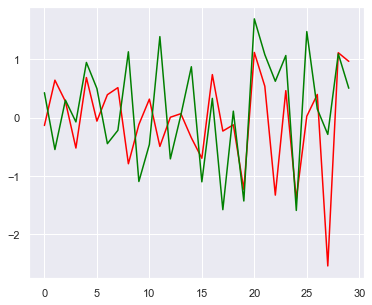

In [27]:
sns.set(rc={'figure.figsize':(6,5)})
plt.plot(range(len(y_equity_pred)), y_equity_pred, c='red')
plt.plot(range(len(y_equity_pred)), y_equity_test, c='green')

### Simple regression for fixed income

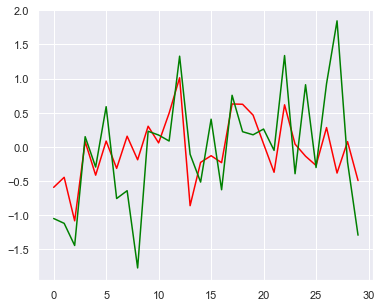

In [28]:
y_fi_pred = Lin_reg_fi.predict(X_test)
plt.plot(range(len(y_fi_pred)), y_fi_pred, c='red')
plt.plot(range(len(y_fi_pred)), y_fi_test, c='green')

### Simple regression for credits

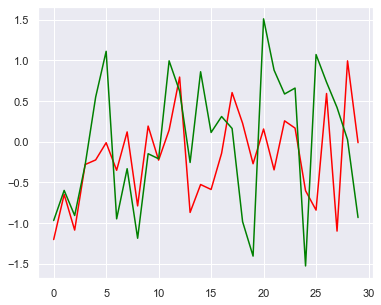

In [29]:
y_credit_pred = Lin_reg_credit.predict(X_test)
plt.plot(range(len(y_credit_pred)), y_credit_pred, c='red')
plt.plot(range(len(y_credit_pred)), y_credit_test, c='green')

### Simple regression for commodities

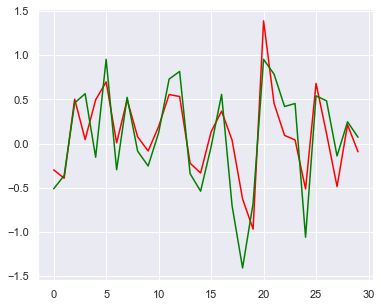

In [30]:
y_commo_pred = Lin_reg_commo.predict(X_test)
plt.plot(range(len(y_commo_pred)), y_commo_pred, c='red')
plt.plot(range(len(y_commo_pred)), y_commo_test, c='green')

# Penalized regression (LASSO)

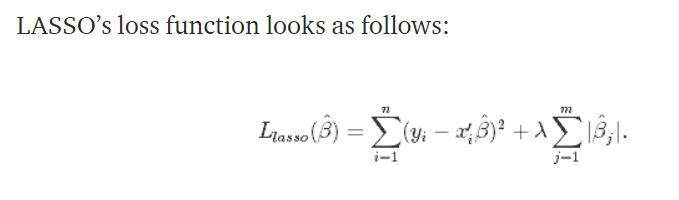

In [31]:
# test sans CV
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score


regLasso1 = Lasso(fit_intercept=True,normalize=True, alpha=1)
regLasso1.fit(X_train, y_equity_train)
print('score train',regLasso1.score(X_train, y_equity_train))
print('score test',regLasso1.score(X_test, y_equity_test))
print('coefs',regLasso1.coef_)


score train 0.0
score test -0.03752139144533384
coefs [ 0.  0. -0. -0. -0. -0. -0. -0.  0.  0. -0.  0.  0. -0. -0. -0.]


In [32]:
# my_alphas = np.array([0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01, 0.015, 0.02, 0.025,  0.05, 0.1, 1.0])
my_alphas = np.linspace(0, 1, 1000)
from sklearn.linear_model import lasso_path
alpha_for_path, coefs_lasso, _  = lasso_path(X_train, y_equity_train.stack(), alphas=my_alphas)

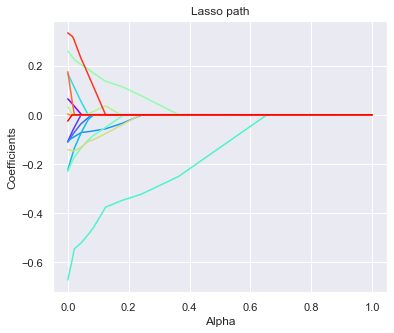

In [33]:
#jeu de couleurs pour faire joli
import matplotlib.cm as cm
couleurs = cm.rainbow(np.linspace(0,1,16))
#graphique lasso path (une courbe par variable)
for i in range(coefs_lasso.shape[0]):
    plt.plot(alpha_for_path,coefs_lasso[i,:],c=couleurs[i])

plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Lasso path')
plt.show()

In [34]:
y_assets_train = [y_equity_train, y_fi_train, y_credit_train, y_commo_train] 
y_assets_test = [y_equity_test, y_fi_test, y_credit_test, y_commo_test]
y_names = ['EQUITIES', 'FIXED INCOME', 'CREDIT', 'COMMODITIES']

dict_assets={}
RMSEs=[]

for asset_train, asset_test, name in zip(y_assets_train, y_assets_test, y_names):
    train_r_squared = np.zeros(len(my_alphas))
    test_r_squared = np.zeros(len(my_alphas))
    RMSE = np.zeros(len(my_alphas))
    params=[]
    i=0
    for alpha in my_alphas:
        regLasso = Lasso(fit_intercept=True,normalize=True, alpha=alpha)
        regLasso.fit(X_train, asset_train)
        y_pred = regLasso.predict(X_test)
        results = cross_val_score(regLasso, X_test, asset_test, cv=5, scoring="r2")

        train_r_squared[i] = regLasso.score(X_train, asset_train)    
        test_r_squared[i] = regLasso.score(X_test, asset_test)
        RMSE[i] = mean_squared_error(asset_test, y_pred, squared=False)
        params.append(regLasso.coef_)
        i+=1
    RMSEs.append(RMSE)
    min_alpha = my_alphas[np.argmin(RMSE)]
    dict_assets.update({ name : 
                       { 'min alpha' : min_alpha,
                         'beta_list' : params[np.argmin(RMSE)]}})
    #     print(f'alpha : {alpha}   RMSE : {mean_squared_error(y_equity_test, y_equity_pred, squared=False)}')



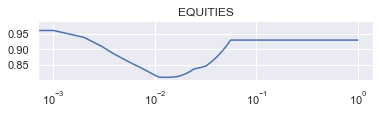

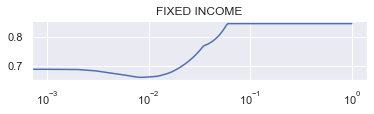

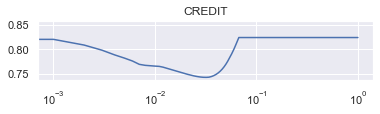

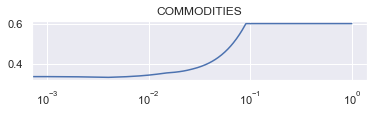

In [35]:
# alpha/RMSE curve for asset classes
for i in range(1, len(RMSEs) +1):
    fig = plt.figure()
    ax = fig.add_subplot(4, 1, i)
    plot, = ax.plot(my_alphas,RMSEs[i-1])
    ax.set_xscale('log')
    plt.title(y_names[i-1])


In [36]:
dict_assets

{'EQUITIES': {'min alpha': 0.013013013013013013,
  'beta_list': array([ 0.        ,  0.        , -0.        , -0.05728112, -0.        ,
          0.        , -0.3568318 , -0.03326572,  0.12352007,  0.01672852,
         -0.07325341,  0.        ,  0.        , -0.        ,  0.        ,
         -0.        ])},
 'FIXED INCOME': {'min alpha': 0.008008008008008008,
  'beta_list': array([-0.        ,  0.08903413, -0.        ,  0.        ,  0.        ,
          0.        ,  0.26032397,  0.        ,  0.        ,  0.46664924,
          0.        , -0.00222483, -0.06073808,  0.        ,  0.11305221,
          0.05918683])},
 'CREDIT': {'min alpha': 0.03203203203203203,
  'beta_list': array([ 0.        ,  0.        , -0.        , -0.        ,  0.        ,
          0.        ,  0.        , -0.        ,  0.        ,  0.28420944,
         -0.        , -0.        , -0.        ,  0.        ,  0.16397401,
          0.01655878])},
 'COMMODITIES': {'min alpha': 0.004004004004004004,
  'beta_list': array

In [37]:
import plotly.express as px
for asset in dict_assets.keys():
    df_coefs_equity = pd.DataFrame(dict_assets[asset]['beta_list'])
    fig = px.bar(df_coefs_equity,
                 x=data_macro_bb.columns,
                 y=df_coefs_equity.values,
                color=0, title=asset)
    fig.show()

## Test cross validation pour les actions

In [38]:
#test cross validation for EQUITIES
lasso_cv = LassoCV(normalize=True, alphas=np.logspace(-10, 1, 400), max_iter=10000)
lasso_model_equity = lasso_cv.fit(X_train, y_equity_train)
lasso_prediction_equity = lasso_model_equity.predict(X_test)
lasso_mae_equity = mean_squared_error(lasso_prediction_equity, y_equity_pred, squared=False)
lasso_coefs_equity = dict(
    zip(['Intercept'] + data_macro_bb.columns.tolist()[:-1], 
        np.round(np.concatenate((lasso_model_equity.intercept_, lasso_model_equity.coef_), axis=None), 3))
)

print('LASSO MAE: {}'.format(np.round(lasso_mae_equity, 3)))
print('LASSO coefficients:')
df_lasso_coefs_equity = pd.DataFrame.from_dict([lasso_coefs_equity]).T

import plotly.express as px
fig = px.bar(df_lasso_coefs_equity,
             x=df_lasso_coefs_equity.index,
             y=df_lasso_coefs_equity.values,
            color=0)
fig.show()

LASSO MAE: 0.264
LASSO coefficients:


# Analyse Dynamique des sensibilités

In [39]:
X = data_macro_bb

In [40]:
X = X.dropna().reset_index(drop=True)

In [41]:
dyn_coefs=[]
 
y_names = ['EQUITIES', 'FIXED INCOME', 'CREDIT', 'COMMODITIES']

for i in range(5):
    down = i*30
    mid = down + 24
    up = (i+1)*30
    y_assets_train = [equity.iloc[down: mid, :], fi.iloc[down: mid, :], credit.iloc[down: mid, :], commo.iloc[down: mid, :]]
    y_assets_test = [equity.iloc[mid: up, :], fi.iloc[mid: up, :], credit.iloc[mid: up, :], commo.iloc[mid: up, :]]
    dict_assets={}
    RMSEs=[]

    for asset_train, asset_test, name in zip(y_assets_train, y_assets_test, y_names):
        train_r_squared = np.zeros(len(my_alphas))
        test_r_squared = np.zeros(len(my_alphas))
        RMSE = np.zeros(len(my_alphas))
        params=[]
        i=0
        for alpha in my_alphas:
            regLasso = Lasso(fit_intercept=True,normalize=True, alpha=alpha)
            regLasso.fit(X.iloc[down: mid, :], asset_train)
            y_pred = regLasso.predict(X.iloc[mid: up, :])
            train_r_squared[i] = regLasso.score(X.iloc[down: mid, :], asset_train)    
            RMSE[i] = mean_squared_error(asset_test, y_pred, squared=False)
            params.append(regLasso.coef_)
            i+=1
        RMSEs.append(RMSE)
        min_alpha = my_alphas[np.argmin(RMSE)]
        dict_assets.update({ name : 
                           { 'min alpha' : min_alpha,
                             'beta_list' : params[np.argmin(RMSE)]}})
    dyn_coefs.append(dict_assets)

In [42]:
all_coefs=[]
for name in y_names:
    coefs = []
    for i in range(len(dyn_coefs)):
        temp = dyn_coefs[i][name]['beta_list'].tolist()
        coefs.append(temp)
    all_coefs.append(coefs)

In [43]:
list_all_df=[]
for i in range(len(all_coefs)):
    df_temp = pd.DataFrame(all_coefs[i], columns=X.columns)
    list_all_df.append(df_temp)

In [44]:
list_all_df

[    CESIG10  SPEDPOSS   CSIIG10  EPUCGLOB      MOVE  BASPTDSP  CIGMEMRA  \
 0  0.014786 -0.081994 -0.020954 -0.003409 -0.014002  0.007554 -4.233276   
 1  0.000000 -0.000000 -0.000000 -0.004514 -0.000000 -0.000000 -0.712058   
 2 -0.008502 -0.000000 -0.000000 -0.000000 -0.001844  0.000000 -1.495701   
 3  0.000033  0.000000 -0.000000 -0.001595 -0.000000  0.000000 -1.934849   
 4  0.000000  0.000000 -0.000000 -0.000000 -0.017139 -0.000000 -0.835368   
 
    USDECMIN     USSOA  MXEF0CX0  EPUCMONE  ECSUSUUS       CRY  JPMVXYEM  \
 0 -0.000392  1.513700  0.013732 -0.000187 -0.071352  0.017978  0.378193   
 1 -0.000000  0.000000 -0.000000 -0.000000  0.000000  0.000000 -0.000000   
 2  0.000108 -7.038505 -0.006266  0.000000 -0.000000 -0.000000 -0.076130   
 3  0.000000 -0.000000  0.005981 -0.004079 -0.000000 -0.000000 -0.139106   
 4  0.000000 -1.351408  0.000000 -0.000000  0.000000  0.000000 -0.000000   
 
     FARBAST   FEDOTLA  
 0  0.000003 -0.003031  
 1 -0.000000 -0.000000  
 2 -0.000

<function matplotlib.pyplot.show(*args, **kw)>

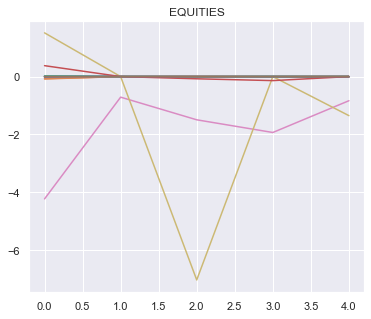

In [45]:
plt.plot(list_all_df[0])
plt.title('EQUITIES')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

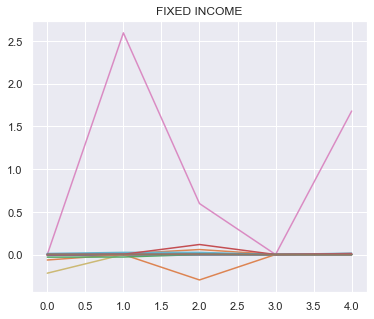

In [46]:
plt.plot(list_all_df[1])
plt.title('FIXED INCOME')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

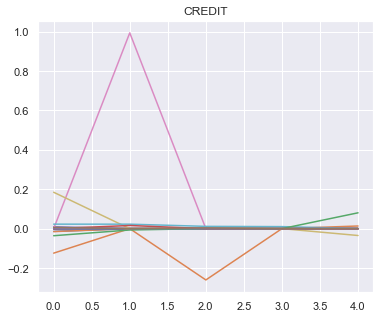

In [47]:
plt.plot(list_all_df[2])
plt.title('CREDIT')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

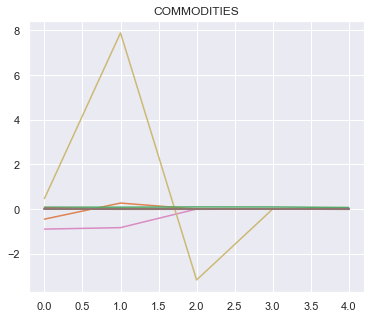

In [48]:
plt.plot(list_all_df[3])
plt.title('COMMODITIES')
plt.show

# VERSION D'ESSAI NON UTILISEE finalement : construction de l'algorithme

In [49]:
def soft_threshold(rho,lamda):
    '''Soft threshold function used for normalized data and lasso regression'''
    if rho < - lamda:
        return (rho + lamda)
    elif rho >  lamda:
        return (rho - lamda)
    else: 
        return 0
    

def coordinate_descent_lasso(theta,X,y,lamda = .01, num_iters=100, intercept = False):
    '''Coordinate gradient descent for lasso regression - for normalized data. 
    The intercept parameter allows to specify whether or not we regularize theta_0'''
    
    #Initialisation of useful values 
    m,n = X.shape
    X = X / (np.linalg.norm(X,axis = 0)) #normalizing X in case it was not done before
    
    #Looping until max number of iterations
    for i in range(num_iters): 
        
        #Looping through each coordinate
        for j in range(n):
            
            #Vectorized implementation
            X_j = X[:,j].reshape(-1,1)
            y_pred = X @ theta
            rho = X_j.T @ (y - y_pred  + theta[j]*X_j)
        
            #Checking intercept parameter
            if intercept == True:  
                if j == 0: 
                    theta[j] =  rho 
                else:
                    theta[j] =  soft_threshold(rho, lamda)  

            if intercept == False:
                theta[j] =  soft_threshold(rho, lamda)   
            
    return theta.flatten()

__equity:__

(0.06309573444801933, 1584.893192461114, -7.815331493354676, 4.216367036011696)

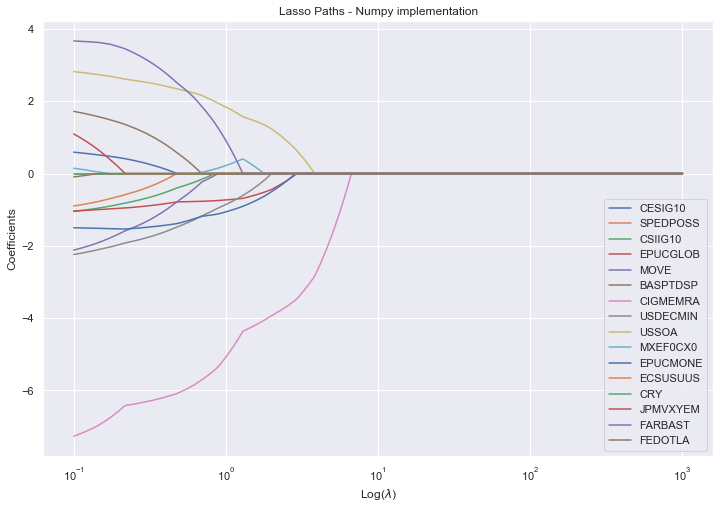

In [50]:
X = np.array(X_train).astype(np.float)
y = np.array(y_equity_train).astype(np.float)

m,n = X.shape
initial_theta = np.ones((n,1))
theta_list = list()
lamda = np.logspace(0,4,300)/10 #Range of lambda values

#Run lasso regression for each lambda
for l in lamda:
    theta = coordinate_descent_lasso(initial_theta,X,y,lamda = l, num_iters=100)
    theta_list.append(theta)

#Stack into numpy array
theta_lasso = np.stack(theta_list).T

#Plot results
n,_ = theta_lasso.shape
plt.figure(figsize = (12,8))

for i in range(n):
    plt.plot(lamda, theta_lasso[i], label = data_macro_bb.columns[i])

plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('Coefficients')
plt.title('Lasso Paths - Numpy implementation')
plt.legend()
plt.axis('tight')

__commodities:__

(0.06309573444801933,
 1584.893192461114,
 -1.9434649512744495,
 10.314135639261876)

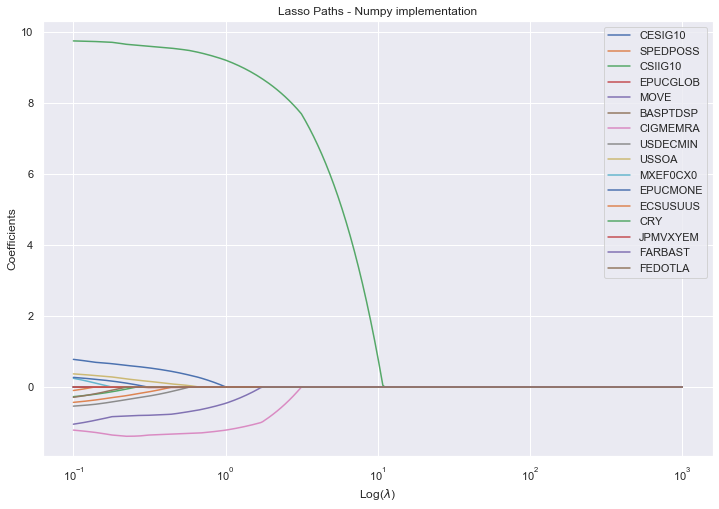

In [51]:
X = np.array(X_train).astype(np.float)
y = np.array(y_commo_train).astype(np.float)

m,n = X.shape
initial_theta = np.ones((n,1))
theta_list = list()
lamda = np.logspace(0,4,300)/10 #Range of lambda values

#Run lasso regression for each lambda
for l in lamda:
    theta = coordinate_descent_lasso(initial_theta,X,y,lamda = l, num_iters=100)
    theta_list.append(theta)

#Stack into numpy array
theta_lasso = np.stack(theta_list).T

#Plot results
n,_ = theta_lasso.shape
plt.figure(figsize = (12,8))

for i in range(n):
    plt.plot(lamda, theta_lasso[i], label = data_macro_bb.columns[i])

plt.xscale('log')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('Coefficients')
plt.title('Lasso Paths - Numpy implementation')
plt.legend()
plt.axis('tight')